### Eq 3. [규제] 다음 코드가 무엇을 의미하는지 이해하고 실행하여 결과를 확인하시오.

In [1]:
#Import to Ridige Model.
from sklearn.linear_model import Ridge
import numpy as np
import numpy.random as rnd
import matplotlib
import matplotlib.pyplot as plt
import seaborn
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

In [2]:
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1) # 
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100,1)

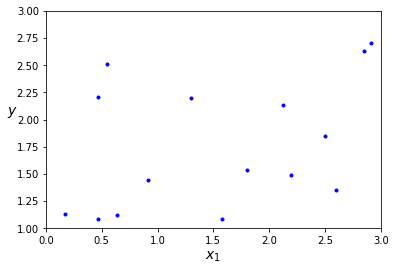

Figure.1


In [3]:
plt.plot(X, y, "b.")

plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$y$", rotation=0, fontsize=14)

plt.axis([0, 3, 1, 3])
plt.show()
print("Figure.1")

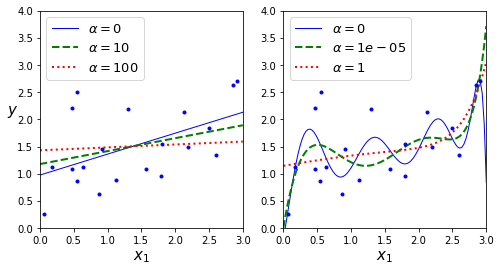

Figure.2


In [4]:
def plot_model(model_class, polynomial, alphas, **model_kargs):
    for alpha, style in zip(alphas, ("b-", "g--",  "r:")):
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        if polynomial:
            model = Pipeline([
                ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                ("std_scaler", StandardScaler()),
                ("regul_reg", model)
            ])
        model.fit(X,y)
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new, y_new_regul, style, linewidth=lw, label=r"$\alpha = {}$".format(alpha))
        
    plt.plot(X, y, "b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=13)
    plt.xlabel("$x_1$", fontsize=15)
    plt.axis([0,3,0,4])

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0,10,100), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=15)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)
plt.show()
print("Figure.2")

(1) Figure.2는 왼쪽 선형 회귀를 오른쪽 리지 회귀와 비교한다.<br>
보다 정확한 이야기로는 왼쪽그림은 리지모델을 사용했지만, 결과적으로 선형적으로 풀어낸 것이고,
오른쪽 모델이 리지 모델을 곡형 방정식에 적용한 예다.

사실 일반적인 선형 분류에서 리지 모델은 기존의 모델과 비교하여 큰 차이가 없다.
하지만 리지 모델. 여기선 능선 모델이라고 부르겠다.
능선 모델을 사용하는 이유는 모든 선형 분류 중에서 특징 분류하기 위한 가중치 변화량에 규제를 주기 위함이다.

이 규제란, 사실 Gradient Descent모델에서도 얼핏 유사한 경험을 할 수 있었는데. 학습률을 1보다 적은 값을 주어 모델을 최대한 보수적으로 학습시키고 최적의 낮은 점을 찾았다.
마찬가지로 리지 모델을 활용하여 유연하게 각 특징 모두를 반영시키면서 분류하기 위해서 곡형 모델에 가중치에 따른 변화량에 규제를 주는 것이다. 

일반적으로 곡형 모델은 가중치가 변할 때, dense한 데이터들 밀도에서 급격하게 변화되는 기울기에 의해 정상적으로 분류하기란 쉽지가 않을 것이다.
사실 각 특징들은 수 많은 노이즈를 품고 있기 때문에 조밀한 밀도 사이에서 완벽한 데이터 분류는 쉽지가 않음을 알고 있다.

그리고, 급격한 기울기의 변화는 앞으로 학습되거나 추측되는 특징들이 과적합을 발생시킬 수 있는데, 너무 완벽하게 분류되는 데이터는 특징을 추론하기가 쉽지가 않다. 

따라서 능선 회귀 모델은 변화량에 규제를 걸어 각각의 특징들을 연속적으로 추측하는 형태가 마치 능선 형태로 분류되는 것을 보여준다.
이것이 능선 회귀모델이며, 곡형 분류에서 과적합과 같은 좋지 못 한 결과를 최대한 최적화 시켜줄 수 있는 모델이다.